In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("AB_NYC_2019.csv")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
data.dropna(inplace = True)

In [5]:
data.drop_duplicates(inplace = True)

In [8]:
data["id"] = data["id"].astype("str")
data["host_id"] = data["host_id"].astype("str")
data["latitude"] = data["latitude"].astype("str")
data["longitude"] = data["longitude"].astype("str")

In [10]:
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
data.nunique()

id                                38821
name                              38244
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [12]:
data["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [13]:
data["neighbourhood_group"].value_counts(normalize = True)

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [14]:
data["room_type"].value_counts()

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [15]:
data["room_type"].value_counts(normalize = True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [16]:
data["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [19]:
data["neighbourhood"].value_counts().reset_index().rename(columns = {"neighbourhood":"neighbourhoods", "count":"Number of hotels"})

,neighbourhoods,Number of hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [23]:
data1 = data["neighbourhood"].value_counts().reset_index().rename(columns = {"neighbourhood":"neighbourhoods", "count":"Number_of_hotels"})
data1

,neighbourhoods,Number_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [25]:
data1[(data1["Number_of_hotels"]>1000)]

,neighbourhoods,Number_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


In [27]:
data["price"].value_counts(bins = 5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [28]:
data["price"].mean()

142.33252621004095

In [29]:
data["price"].std()

196.99475591833985

In [30]:
data["price"].skew()

23.673594295123014

In [31]:
data["price"].kurt()

953.4807356344944

In [ ]:
data.corr()

In [33]:
import seaborn as sns

In [36]:
df = pd.read_csv("AB_NYC_2019.csv")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

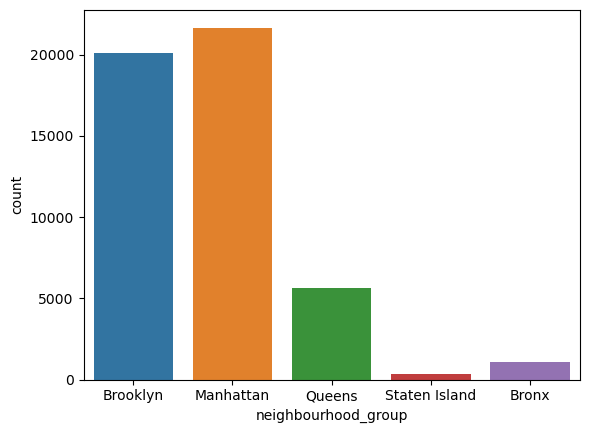

In [37]:
sns.countplot(data = df, x = "neighbourhood_group")

<Axes: xlabel='room_type', ylabel='count'>

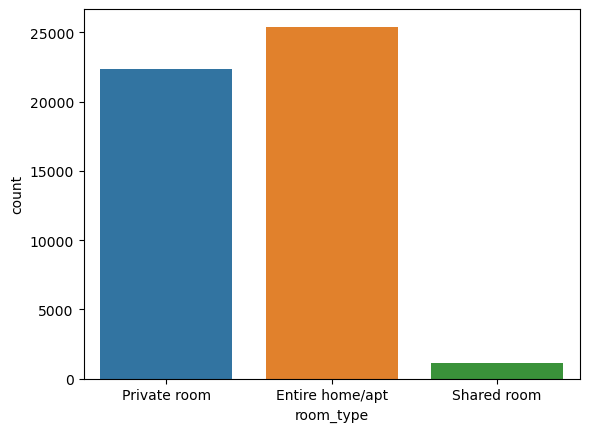

In [38]:
sns.countplot(data = df, x = "room_type")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

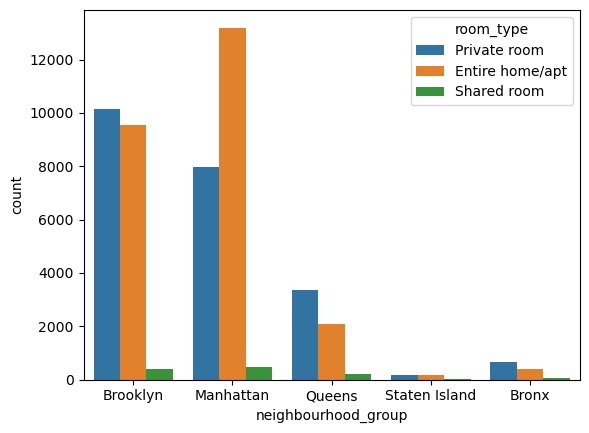

In [44]:
sns.countplot(data = df, x = "neighbourhood_group", hue = "room_type")

<Axes: ylabel='count'>

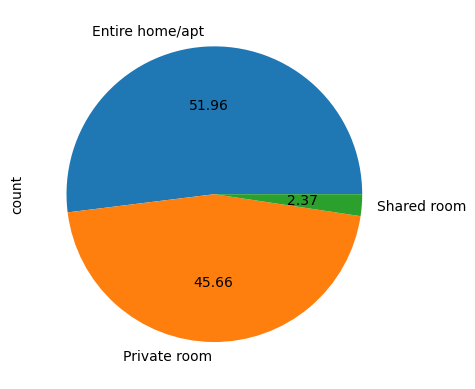

In [5]:
data["room_type"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: ylabel='count'>

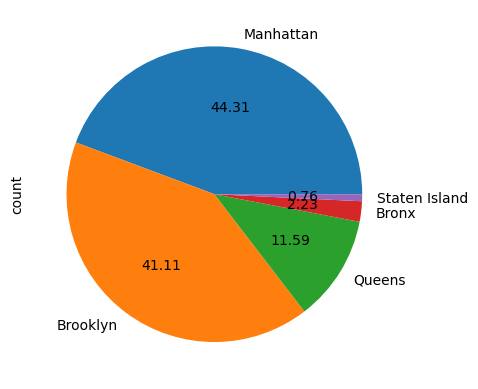

In [6]:
data["neighbourhood_group"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='neighbourhood_group'>

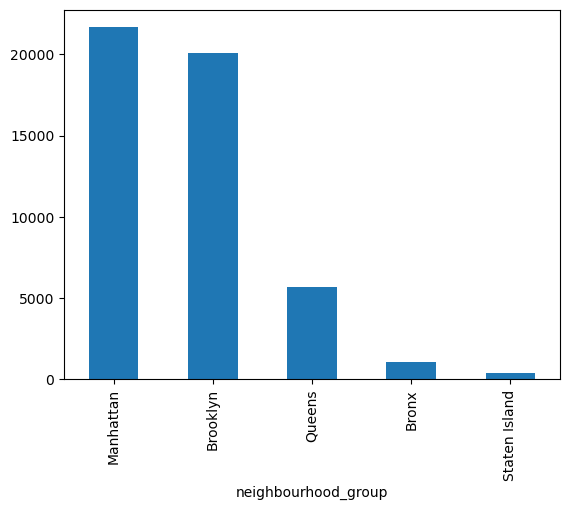

In [8]:
data["neighbourhood_group"].value_counts().plot(kind = "bar")

In [9]:
import seaborn as sns

In [10]:
df2 = sns.load_dataset("titanic")

In [11]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='survived', ylabel='count'>

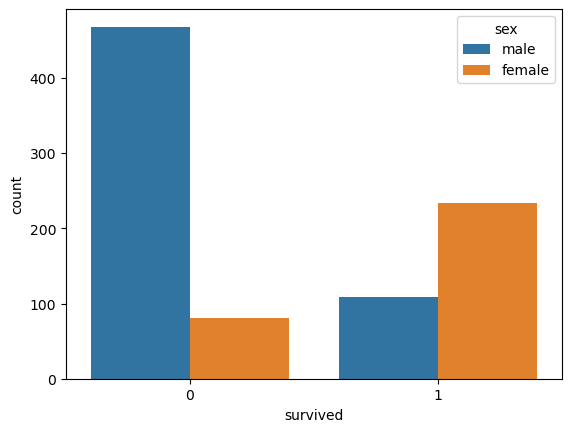

In [13]:
sns.countplot(data = df2, x = "survived", hue = "sex")

D:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

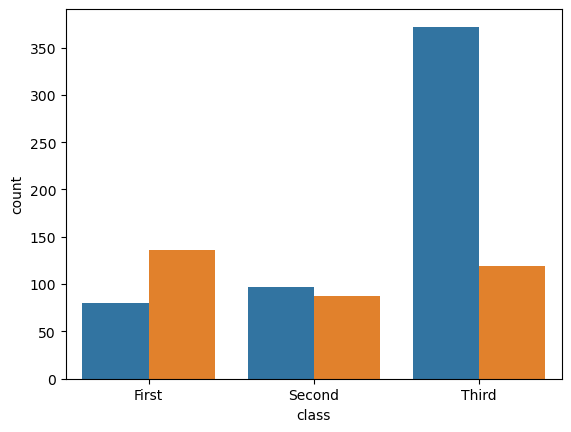

In [16]:
sns.countplot(data = df2, x = "class", hue = "survived")

<Axes: ylabel='count'>

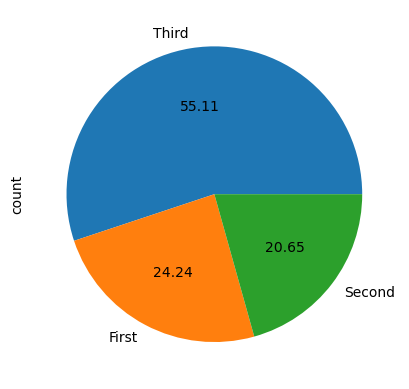

In [19]:
df2["class"].value_counts().plot(kind = "pie", autopct = "%.2f")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

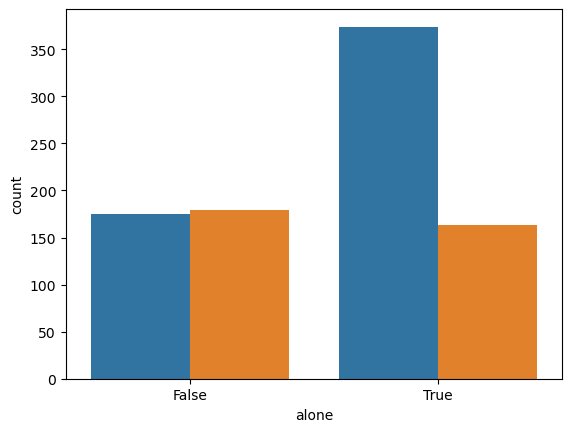

In [21]:
sns.countplot(data = df2, x = "alone", hue = "survived")

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

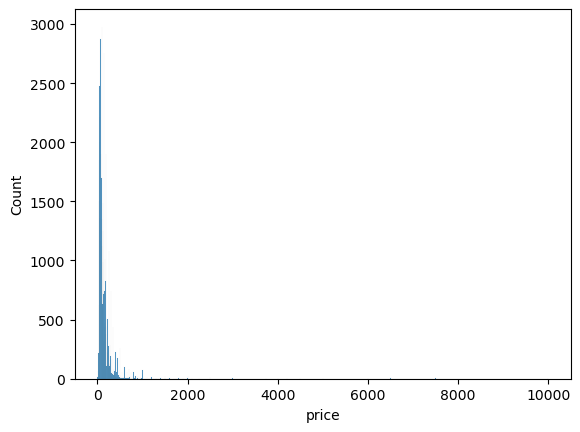

In [22]:
sns.histplot(data = data,x = "price")

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

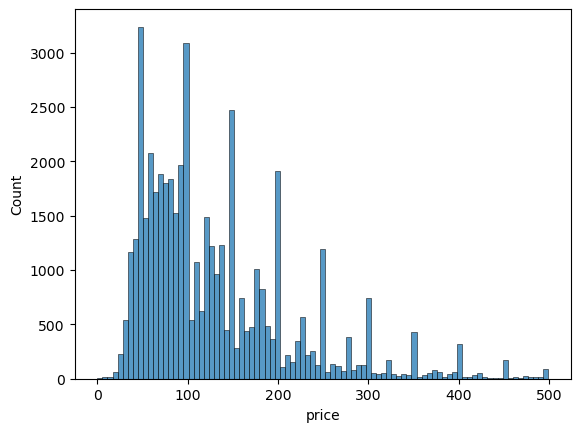

In [25]:
sns.histplot(data = data[data["price"]<500],x = "price")

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Count'>

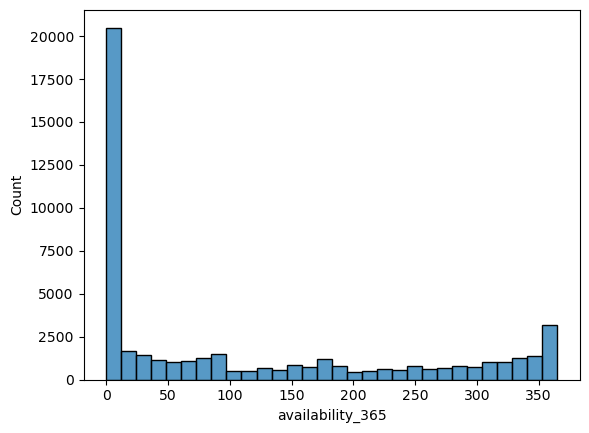

In [26]:
sns.histplot(data = data,x = "availability_365")

C:\Users\lakshay\AppData\Local\Temp\ipykernel_19176\1015793615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"])
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

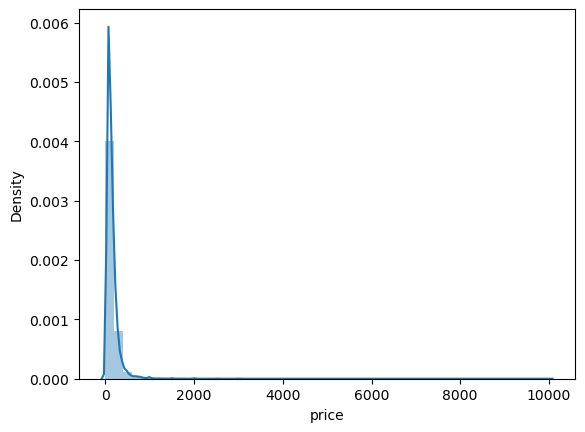

In [28]:
sns.distplot(data["price"])

C:\Users\lakshay\AppData\Local\Temp\ipykernel_19176\306646382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["availability_365"])
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Density'>

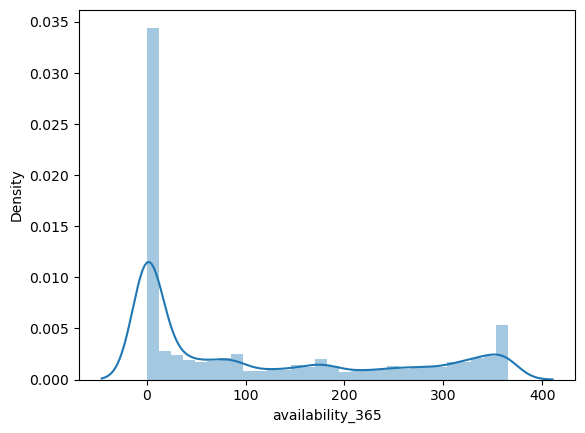

In [30]:
sns.distplot(data["availability_365"])

C:\Users\lakshay\AppData\Local\Temp\ipykernel_19176\3296406947.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["reviews_per_month"])
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='reviews_per_month', ylabel='Density'>

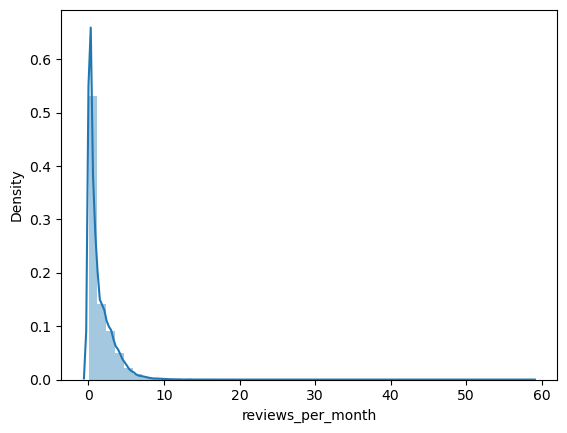

In [31]:
sns.distplot(data["reviews_per_month"])

<Axes: >

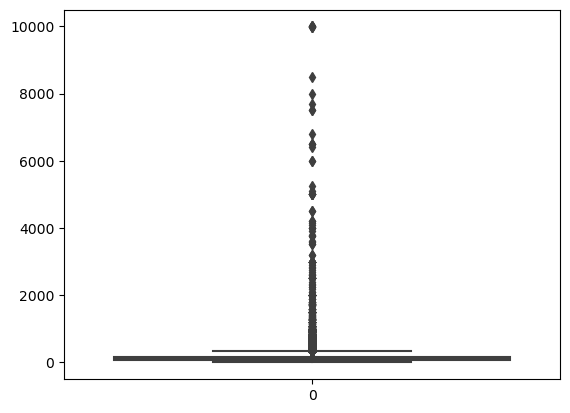

In [33]:
sns.boxplot(data["price"])

<Axes: >

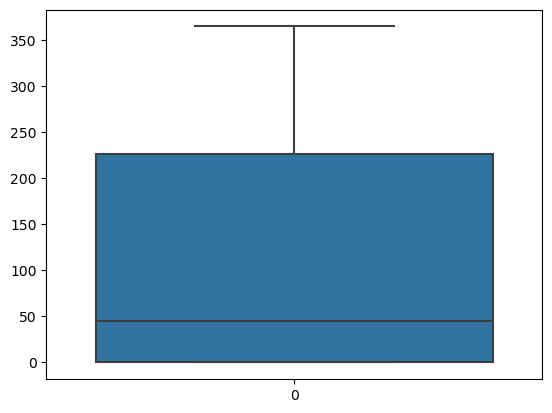

In [34]:
sns.boxplot(data["availability_365"])

In [35]:
df3 = sns.load_dataset("titanic")
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

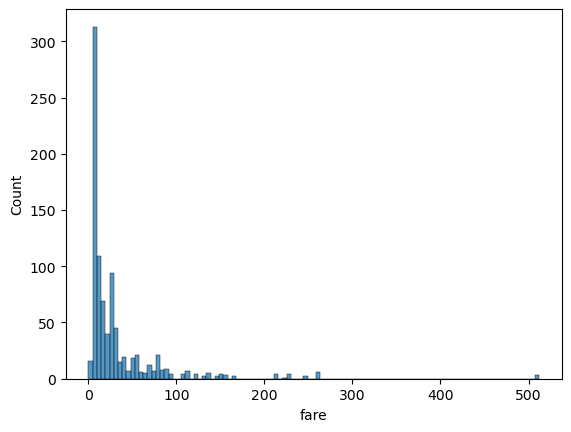

In [36]:
sns.histplot(data = df3, x = "fare")

C:\Users\lakshay\AppData\Local\Temp\ipykernel_19176\3450757052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3["fare"])
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Density'>

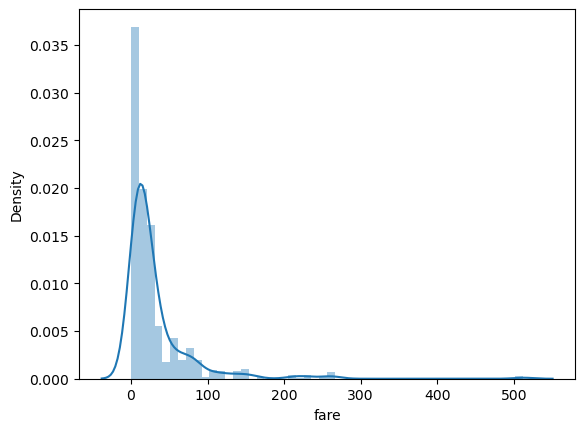

In [37]:
sns.distplot(df3["fare"])

<Axes: >

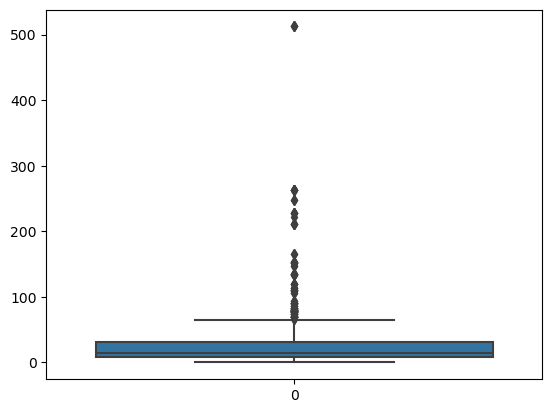

In [38]:
sns.boxplot(df3["fare"])

<Axes: >

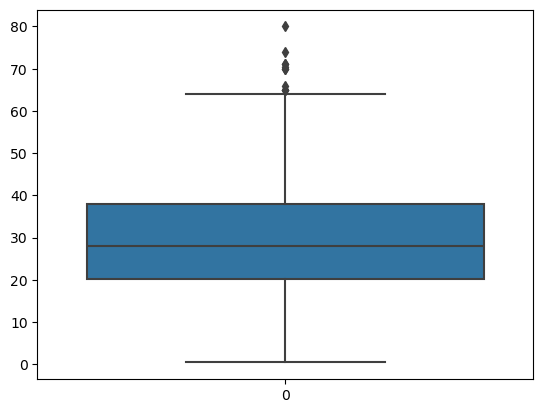

In [39]:
sns.boxplot(df3["age"])

<Axes: >

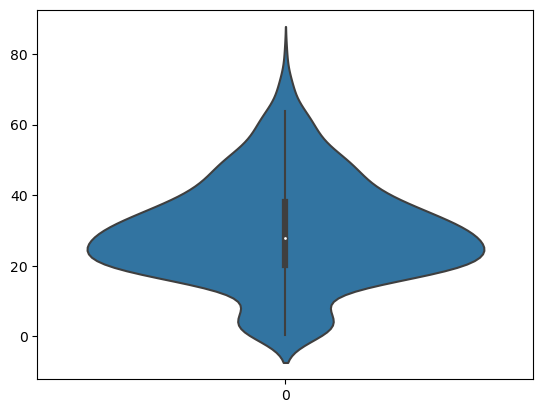

In [40]:
sns.violinplot(df3["age"])

<Axes: >

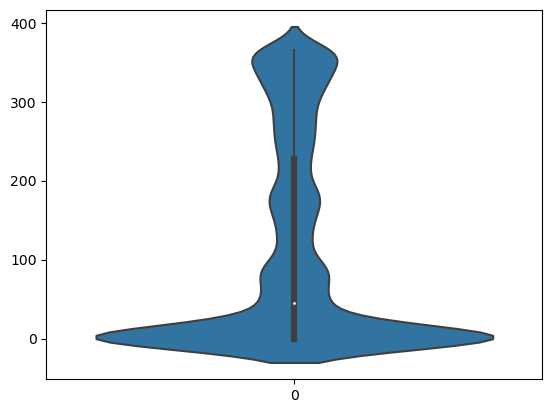

In [42]:
sns.violinplot(data["availability_365"])